Text(0.5, 0, '$\\sigma\\,/\\,\\mathrm{ADC}$')

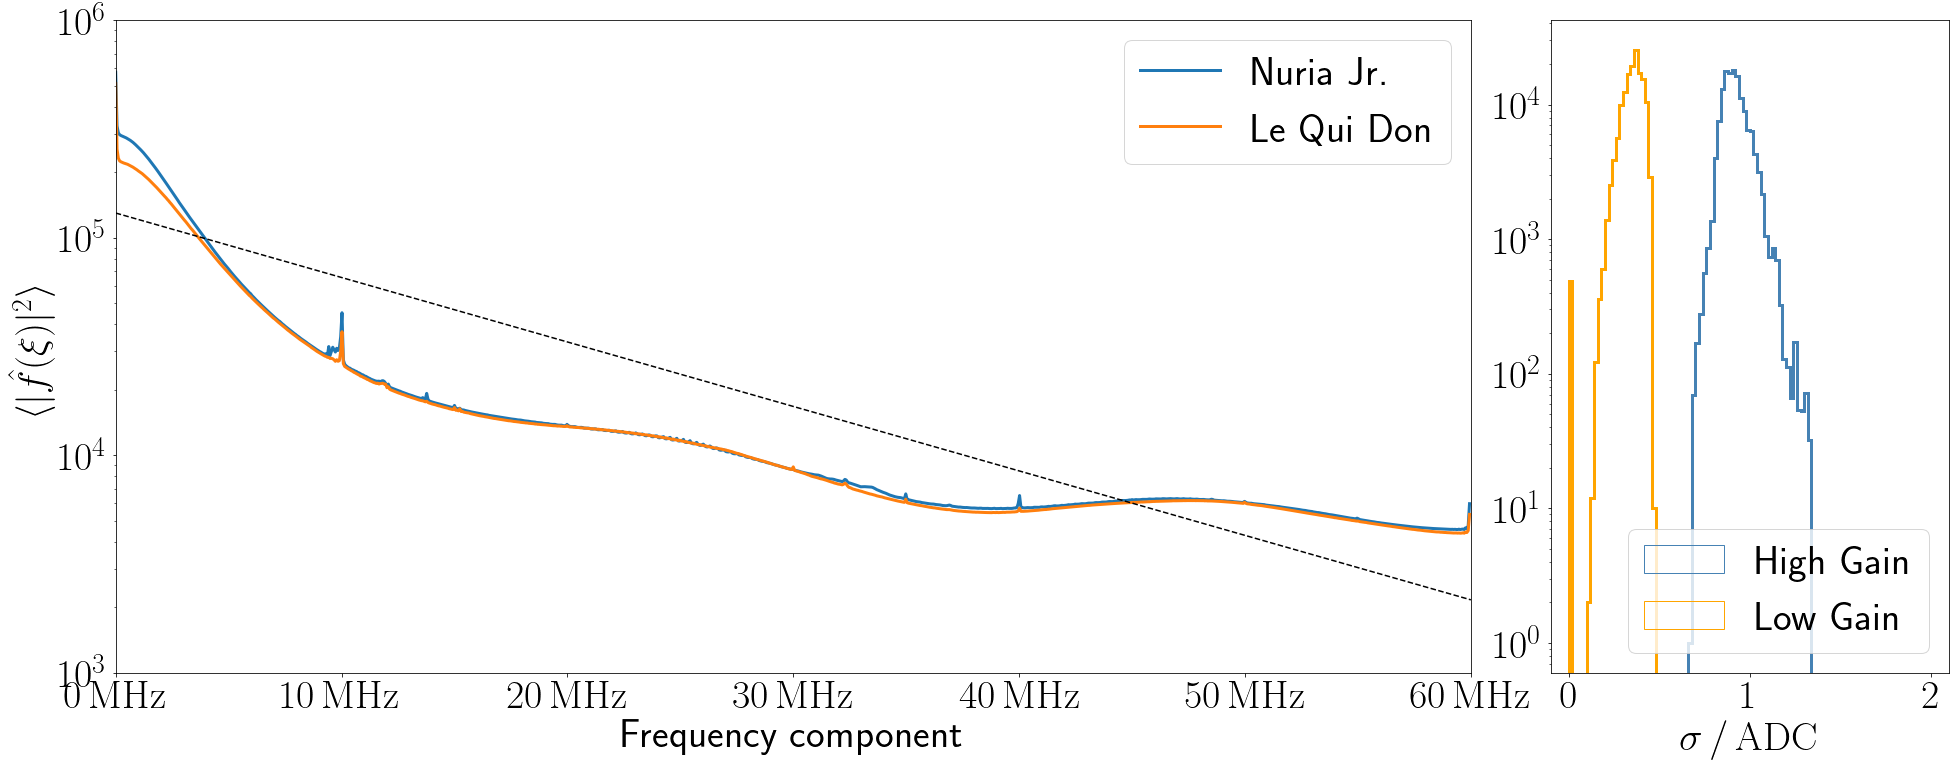

In [18]:
from Binaries import *
import uproot

plt.rcParams["figure.figsize"] = [50, 12]

file = uproot.open(f"/cr/tempdata01/filip/iRODS/NewRandoms/mc_2022_11_15_00h00.root:SDMonCal")

is_UUB = np.array(file["SDMonCalBranch/fMonitoring/fMonitoring.fIsUUB"].array())
RMS_HG = np.mean(np.array(file["SDMonCalBranch/fCalibration/fCalibration.fVarianceDynode[3]"].array()).T, axis = 0)
RMS_LG = np.mean(np.array(file["SDMonCalBranch/fCalibration/fCalibration.fVarianceAnode[3]"].array()).T, axis = 0)

ax2 = plt.subplot2grid((1, 6), (0, 0), colspan = 3)
ax1 = plt.subplot2grid((1, 6), (0, 3))

_ = ax1.hist(np.sqrt(RMS_HG[is_UUB]), histtype = "step", range = (0, 2), bins = 100, color = "steelblue", lw = 3)
_ = ax1.hist(np.sqrt(RMS_LG[is_UUB]), histtype = "step", range = (0, 2), bins = 100, color = "orange", lw = 3)
# plt.axvline(np.mean(RMS_HG[is_UUB]), c = "steelblue", ls = "--")
# plt.axvline(np.mean(RMS_LG[is_UUB]), c = "orange", ls = "--")

ax1.hist([], color = "steelblue", label = "High Gain", histtype = "step")
ax1.hist({}, color = "orange", label = "Low Gain", histtype = "step")

ax1.set_xlabel("")
ax1.set_yscale("log")

fft_container1 = np.loadtxt("/cr/users/filip/thesis/scripts/random-traces-fft/nuria.csv")
fft_container2 = np.loadtxt("/cr/users/filip/thesis/scripts/random-traces-fft/lo_qui_don.csv")
fft_container3 = np.loadtxt("/cr/users/filip/thesis/scripts/random-traces-fft/showers.csv")

half1 = np.split(fft_container1, 2)[0]
half2 = np.split(fft_container2, 2)[0]
half3 = np.split(fft_container3, 2)[0]

ax2.plot(range(1024), half1, label = "Nuria Jr.", lw = 3)
ax2.plot(range(1024), half2, label = "Le Qui Don", lw = 3)
ax2.legend()

X = np.linspace(0, 1024, 100)
ax2.plot(X, 0.5 * (half1[3] + half2[3]) * np.exp(-1/250 * X - 0.7), c = "k", ls = "--", label = r"$-6\,\mathrm{dB}\,/\,\mathrm{Oct}$")

ax2.set_ylabel(r"$\langle | \hat{f}(\xi) | ^{2} \rangle$")
ax2.set_xticks([i * 1024/6 for i in range(7)], [f"${i * 10}\,\mathrm{{MHz}}$" for i in range(7)])
ax2.set_yscale("log")
ax2.set_xlabel("Frequency component")
ax2.set_ylim(10**3, 10**6)
ax2.set_xlim(0, 1024)
ax1.legend(loc="lower right")
ax1.set_xlabel("$\sigma\,/\,\mathrm{ADC}$")
